## Set the repository path

In [1]:
pyCPT_path = '../'

## Import modules

In [2]:
# Add the repository path into python path
import sys
sys.path.append(pyCPT_path)

# Import modules
import pyCPT
import post_process

## Read the NGES dataset and identify the optimal number of soil states
#### Note: 1) Data file should contain 3 columns: ( depth, Fr, Qt ); 2) Data should start from the 1st row!

In [12]:
import numpy as np
prior_mu = np.array([[0.33136292, 1.78557301],
       [0.72919072, 1.43888076],
       [0.63045566, 1.04736416],
       [0.46410682, 1.60826738],
       [0.42322467, 2.35724374],
       [0.77750357, 1.68469789],
       [0.36149448, 1.24393027]])
prior_mu_std = 1
prior_cov = np.array([[[ 0.00357893,  0.00191449],
        [ 0.00191449,  0.00918239]],

       [[ 0.00320906, -0.0018044 ],
        [-0.0018044 ,  0.00400412]],

       [[ 0.00131583,  0.00111102],
        [ 0.00111102,  0.02355203]],

       [[ 0.00573804, -0.00384005],
        [-0.00384005,  0.00647612]],

       [[ 0.03743975, -0.04114002],
        [-0.04114002,  0.04935895]],

       [[ 0.00114044,  0.00023517],
        [ 0.00023517,  0.0260668 ]],

       [[ 0.01394274, -0.02432719],
        [-0.02432719,  0.04800507]]])

Number of data points:  [296]
Fitting model with number of components =  1
Fitting model with number of components =  2
Fitting model with number of components =  3
Fitting model with number of components =  4
Fitting model with number of components =  5
Fitting model with number of components =  6
Fitting model with number of components =  7
Fitting model with number of components =  8
Fitting model with number of components =  9
Fitting model with number of components =  10


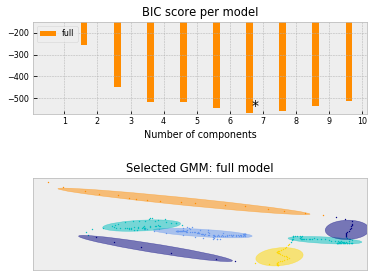

In [8]:
datapath = '../test_data/NGES_data.csv'
cpt = pyCPT.CPT(datapath)

In [13]:
datapath = '../test_data/NGES_data.csv'
cpt = pyCPT.CPT(datapath,prior_mu=prior_mu,prior_mu_std=prior_mu_std,prior_cov=prior_cov)

Number of data points:  [296]


## Extract soil segments

In [14]:
cpt.segmentation(num_of_iter=200, start_iter=100)

Fitting the initial Gaussian mixture model...
Fitting is done!


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 17.44it/s]


## Soil interpretation

In [15]:
cpt.detect_layers()

## Visualization

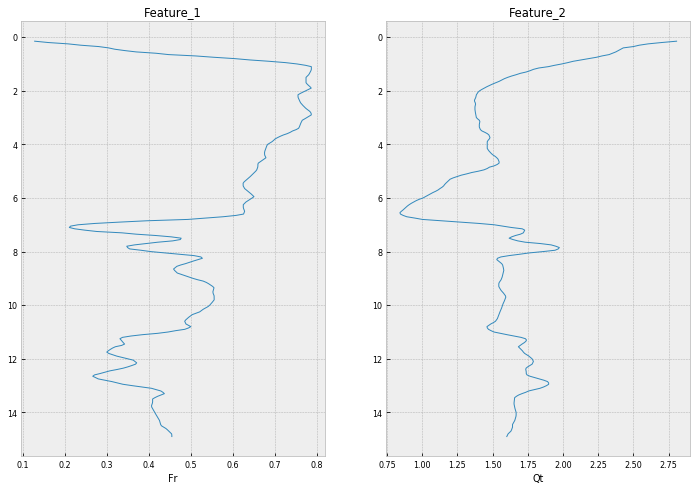

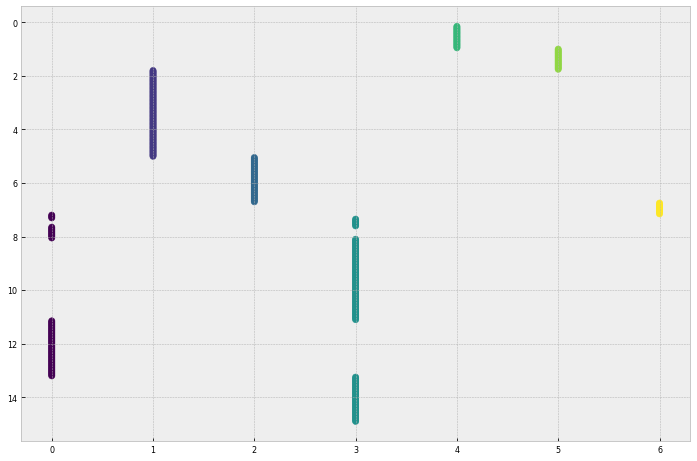

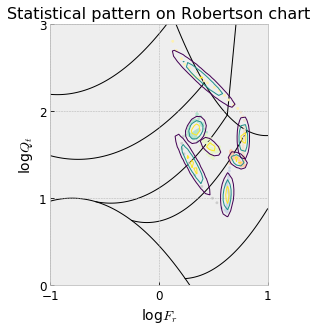

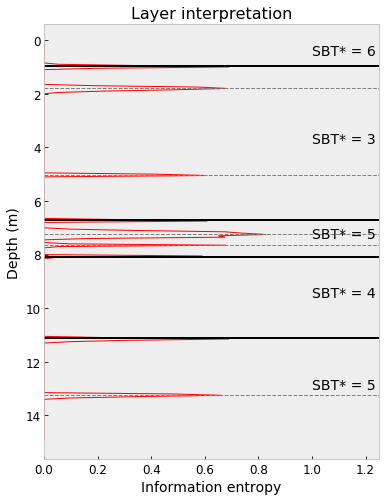

In [16]:
post_process.plot_feature(cpt.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt.element, cpt.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt, aspect=0.8) # show the statistical pattern
pyCPT.plot_layers(cpt) # show the soil layers

#### Identified issue: When you test the repository by using the on-line interactive binder version, some noise contour lines could show up in the contour plot on the Roberson chart. This is an identified issue and probabily related to the version of the package "matplotlib" in MyBinder.org. The colone version from the github repository does not have such behavior.